# Writing A Data Science Blog Post
## 

### By: David Herr
### Dated: August 2nd, 2020

A Jupyter notebook aimed to complete the Udacity Data Science Nanodegree Project 1. In the project, students are to use the CRISP-DM process to understand, prepare, model, and evaluate data to answer real-world business questions.

First, we'll bring in the packages used to complete the project.

In [1]:
# data import and manipulation 
import pandas as pd

# plotting and graphing
%matplotlib inline

# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# custom modules
import fns_DataVisualization as viz
import fns_DataWrangling as DataWrngl
import fns_TextWrangling as TxtWrngl

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dlher\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dlher\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dlher\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### 1) Pick A Dataset

Although the traditional CRISP-DM path is to start with business questions, the Udacity Data Science program provided datasets to start with. Thus, we'll start with those datasets and read them in to the notebook.

In [2]:
# Read in Boston dataset
df_boston = pd.read_csv('./_data/listings_boston.csv')

# Read in Seattle dataset
df_seattle = pd.read_csv('./_data/listings_seattle.csv')

# Place dataframes in list for bulk analysis
df_list = [df_boston,df_seattle]


### 2) Pose 3-5 Business Questions
Leveraging this data, we are curious to find out if:

    1. Bedroom or Bathroom count generally correlates to higher pricing?
    2. Are there certain neighborhoods which command generally higher pricing?
    3. Does containing a top N keyword in descriptions result in higher pricing?
    4. Are ratings predictive of pricing?

In [ ]:
#### 3) Use CRISP_DM 
To answer these questions, we'll use what is known as the CRISP_DM process. This process is pictated below:

![Image of CRISP_DM](_img\CRISP_DM.png)


##### 3.1) Business Understanding

**Boston Bed/Bath Analysis**
***

<module 'matplotlib.pyplot' from 'C:\\Users\\dlher\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

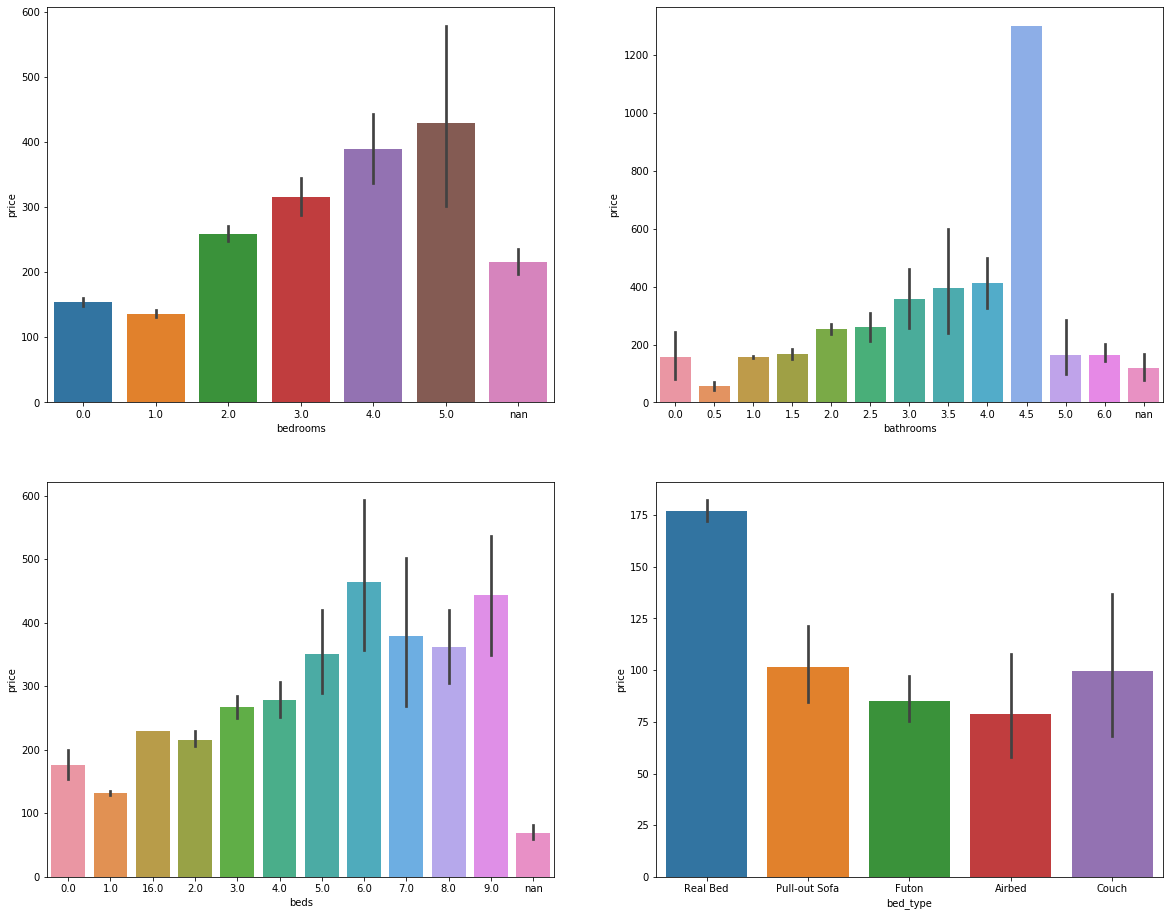

In [3]:
# define columns to be used for price vs. bed/bath analysis
bed_bath_cols = ['price','bedrooms','bathrooms','beds','bed_type']

# call 2x2 price analysis plot for all bed/bath cols (Boston)
viz.price_analysis_plots(df_boston[bed_bath_cols])

**Boston Neighborhood Analysis**
***

<module 'matplotlib.pyplot' from 'C:\\Users\\dlher\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

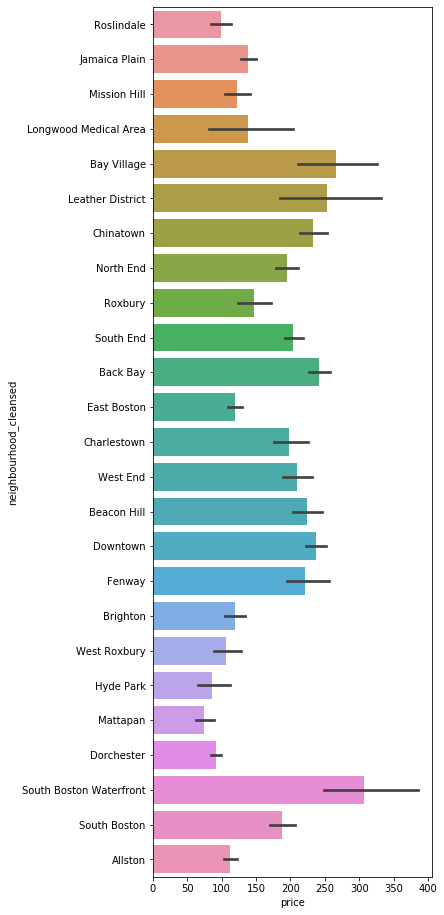

In [4]:
# define columns to be used for price vs. neighbourhood analysis
neighborhood_cols = ['price','neighbourhood_cleansed']

# call 1x1 price analysis plot for neighborhoods cols (Boston)
viz.price_analysis_plots(df_boston[neighborhood_cols], False)

##### 3.2) Data Understanding

While the head() method is useful, a more thorough understanding of all the available columns, datatypes, as well as profile of that data, is necessary before moving on to preparing the data for modeling.

In [6]:
# And see the overall shape of each data frame, column names, and column data types
DataWrngl.print_column_types(df_list)


Dataframe Shape:(3585, 95)
id:int64
listing_url:object
scrape_id:int64
last_scraped:object
name:object
summary:object
space:object
description:object
experiences_offered:object
neighborhood_overview:object
notes:object
transit:object
access:object
interaction:object
house_rules:object
thumbnail_url:object
medium_url:object
picture_url:object
xl_picture_url:object
host_id:int64
host_url:object
host_name:object
host_since:object
host_location:object
host_about:object
host_response_time:object
host_response_rate:object
host_acceptance_rate:object
host_is_superhost:object
host_thumbnail_url:object
host_picture_url:object
host_neighbourhood:object
host_listings_count:int64
host_total_listings_count:int64
host_verifications:object
host_has_profile_pic:object
host_identity_verified:object
street:object
neighbourhood:object
neighbourhood_cleansed:object
neighbourhood_group_cleansed:float64
city:object
state:object
zipcode:object
market:object
smart_location:object
country_code:object
country:

##### 3.3) Data Preperation
In this section, we will be using our above observations to guide both the initial cleansing of our data, as well as initial transformations for feature creation.

**Column Cleansing**
***

We'll start with the data cleansing process on the columns. This will largely involve removing:

- [x]  100% empty
- [x]  Columns with 100% of the same value
- [x]  Database identifications
- [x]  Non-overlapping columns

In [7]:
# Start with dropping columns in all data sets that are 100% na
DataWrngl.drop_na_columns(df_list)

# Define search words to drop common identification column suffixes
search_words = ['_id','_url','_scraped']

# Invoke function to drop id, url, and scraping columns
DataWrngl.drop_ident_columns(df_list,search_words)

# Invoke function to drop any columns containing rows with 100% the same data point
DataWrngl.drop_same_columns(df_list)

# Invoke function to drop non-overlapping columns between two datasets    
DataWrngl.drop_nonoverlap_columns(df_list[0],df_list[1])

# Check to make sure all columns are overlapping between dataframes
sum((df_boston.columns == df_seattle.columns)) / ((len(df_boston.columns) + len(df_seattle.columns)) / 2 ) == 1

True

**Row & Data Cleansing**
***
Next, we'll move into basic *row cleansing* for items we know will break a linear regression model. This includes:

- [x]  True/False - transform to a true boolean rather than text "t" or "f".
- [x]  Substantial Text - must be transformed into a text analytics feature.
- [ ]  Date Columns - drop or transform into a duration if business questions warrant.

In [8]:
# Invoke function to change 't' or 'f' to true Boolean values
DataWrngl.cleanse_data_tf_to_boolean(df_list)

#  Define text columns which require processing for text analytics
text_columns = ['name','summary','space','description','neighborhood_overview', 'notes']

# Invoke tokenization as add columns in both dataframes
TxtWrngl.tokenize_text_columns(df_list,text_columns)

In [ ]:
# initialize count vectorizer object
vectorizer = CountVectorizer(tokenizer=tokenize)

# get counts of each token (word) in text data
top_vocab = vectorizer.fit_transform(df_boston['summary'].apply(str))

# Create dataframe to hold vocabulary and count of each item
top_vocab_df = pd.DataFrame((count,word) for word, count in zip(sum(top_vocab.toarray()).tolist(),vectorizer.get_feature_names()))

# Assign column names to new dataframe
top_vocab_df.columns = ['Word', 'Count']

# Sort descending to see top words
top_vocab_df.sort_values('Count', ascending=False, inplace=True)

# Preview results of dataframe
top_vocab_df.head(20)


In [ ]:
# Convert the top 20 words to a list for feature extraction
top_vocab_df.nlargest(20,'Count')['Word'].tolist()

##### 3.4) Data Modeling

[Outline placeholder for data modeling section]

##### 3.5) Results Evaluation

[Outline placeholder for evaluation of model and possible re-modeling]

##### 3.6) Deployment

[Outline placeholder for what deployment steps would be]

#### 4. Conclusion

[Outline placeholder for final remarks]